Seaborn: A statistical data visualization library built on Matplotlib, useful for clustering heatmaps and pairplots.
NumPy: Used for numerical operations and array handling.
Matplotlib: Essential for plotting data.
Scikit-learn: A powerful machine learning library used for generating synthetic data, computing performance metrics, and other ML utilities.
SciPy: Contains clustering utilities like hierarchical clustering.

Seaborn Dataset: The Iris dataset, a classic example in machine learning, is loaded using sns.load_dataset("iris").
Removing the 'species' column: The target labels (species) are separated out, and only the features remain in iris. The species labels are stored in the variable species.
Inspecting Unique Species: The species.unique() method prints out the unique species in the dataset, which should output three species: Setosa, Versicolor, and Virginica.

['setosa' 'versicolor' 'virginica']


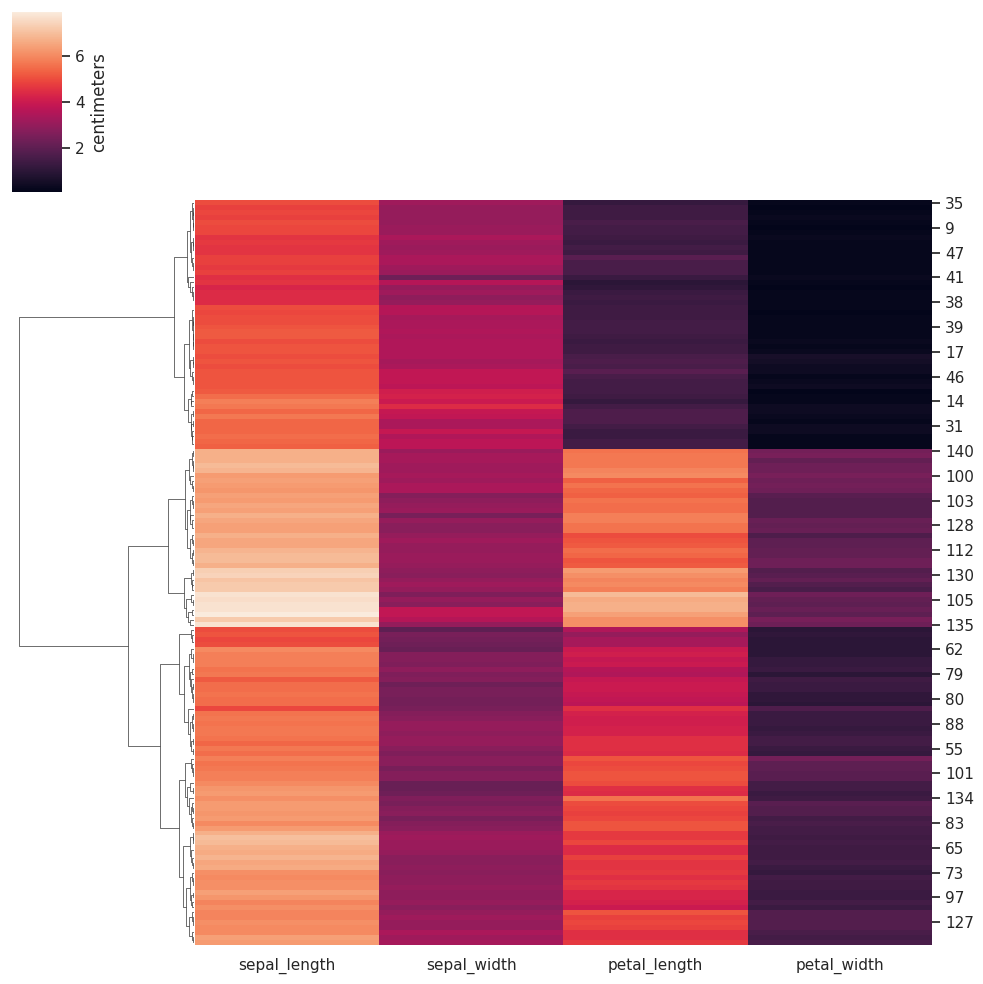

In [ ]:
import seaborn as sns; sns.set(color_codes=True)
iris = sns.load_dataset("iris")
species = iris.pop("species")   # Remove the species column
print(species.unique())         # The samples seems to be from these three species
sns.clustermap(iris, method="ward", col_cluster=False, cbar_kws={'label': 'centimeters'}); # Cluster only the rows

# Synthetic data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Creates a synthetic dataset of 500 samples with 4 distinct clusters (centers=4). The cluster_std parameter defines the standard deviation of the clusters' spread.
X contains the features (coordinates of the samples), and y_true contains the true labels for each sample.
Previewing the Data: X[:10] and y_true[:10] print the first 10 samples and their true labels.

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(centers=4, n_samples=500, random_state=0, cluster_std=0.7)
print(X[:10])
print(y_true[:10])

[[ 2.46023257  1.14242178]
 [ 3.66800921  0.15565258]
 [ 1.00830104  4.17275863]
 [ 0.16694238  4.850626  ]
 [ 1.14069873  2.05835514]
 [-1.59017142  3.87520033]
 [-0.11902434  2.88666546]
 [ 0.70514131  4.0921754 ]
 [ 1.42436215  3.1719181 ]
 [-1.08861845  7.97649598]]
[1 1 0 0 1 2 2 0 0 3]


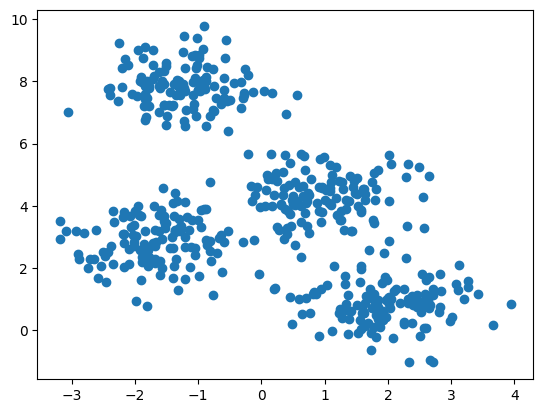

In [ ]:
plt.scatter(X[:,0],X[:,1]);

Hierarchical Clustering: The synthetic data (X) is clustered using the same method (ward) and visualized using a Seaborn clustermap with the coolwarm color map.
Row clustering is performed (col_cluster=False), meaning that the focus is only on grouping the samples (rows).

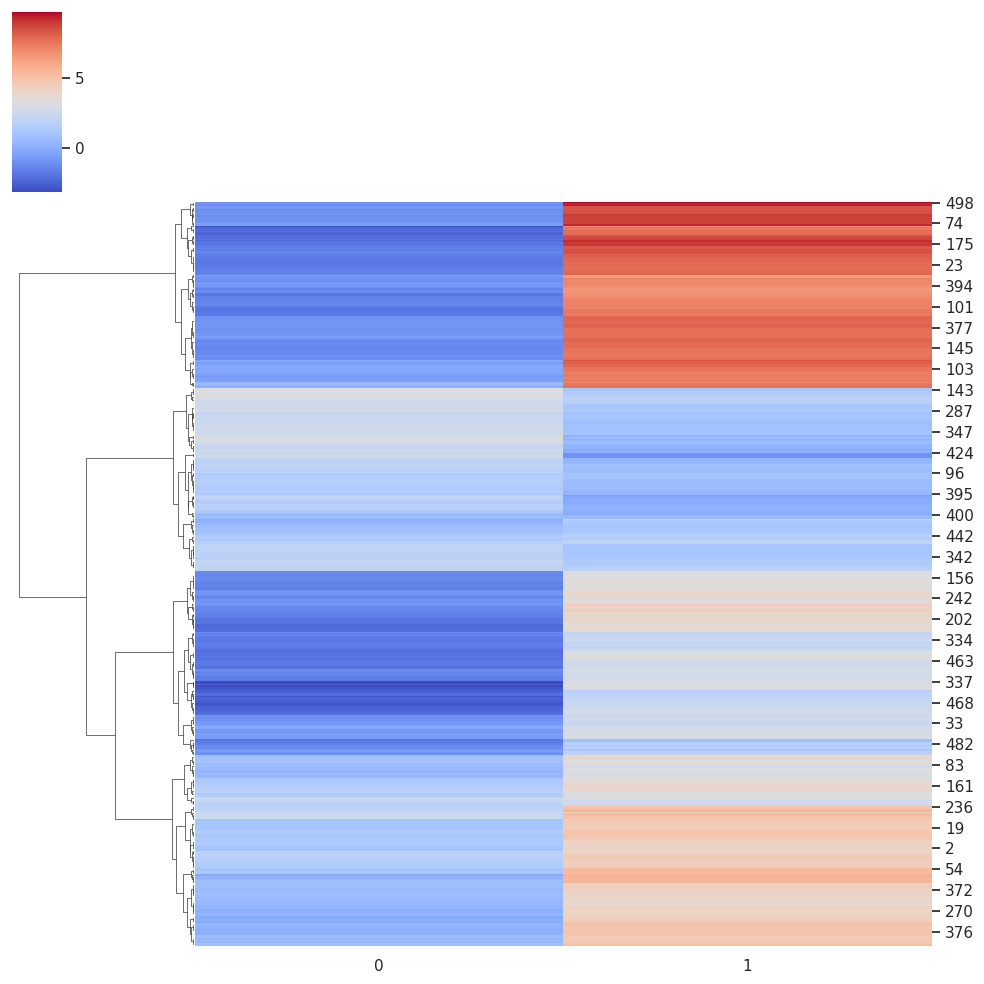

In [ ]:
import seaborn as sns; sns.set(color_codes=True)
clustergrid = sns.clustermap(X, method="ward", cmap="coolwarm", col_cluster=False); # Cluster only the rows

In [ ]:
from scipy.cluster.hierarchy import fcluster
threshold = 4
cluster_labels = fcluster(clustergrid.dendrogram_row.linkage, threshold, criterion='maxclust')

In [ ]:
y_true

array([1, 1, 0, 0, 1, 2, 2, 0, 0, 3, 2, 1, 2, 3, 0, 0, 1, 0, 3, 0, 0, 1,
       2, 3, 0, 3, 1, 2, 3, 2, 2, 2, 1, 2, 2, 1, 3, 0, 3, 1, 3, 0, 0, 1,
       2, 1, 0, 0, 1, 1, 3, 3, 2, 0, 0, 2, 2, 3, 3, 1, 1, 3, 1, 1, 1, 2,
       0, 1, 0, 2, 3, 0, 3, 1, 3, 1, 2, 2, 0, 0, 3, 0, 3, 0, 0, 2, 3, 3,
       1, 3, 3, 3, 1, 3, 0, 0, 1, 1, 1, 0, 3, 3, 1, 3, 0, 0, 2, 1, 0, 3,
       3, 2, 3, 3, 1, 3, 1, 0, 2, 1, 0, 3, 1, 1, 3, 1, 1, 1, 1, 3, 0, 3,
       2, 3, 3, 3, 0, 1, 0, 2, 1, 1, 1, 1, 2, 3, 0, 0, 2, 3, 3, 1, 0, 0,
       0, 2, 2, 1, 2, 0, 1, 0, 1, 1, 2, 2, 1, 0, 3, 2, 1, 3, 1, 2, 0, 3,
       0, 3, 3, 3, 1, 1, 1, 0, 2, 3, 2, 1, 2, 3, 1, 2, 3, 2, 2, 3, 0, 2,
       0, 3, 3, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 1, 0, 1, 2, 3, 3, 3,
       0, 1, 2, 3, 2, 1, 3, 0, 3, 2, 2, 2, 2, 2, 0, 0, 0, 2, 3, 1, 1, 2,
       2, 1, 3, 3, 0, 1, 0, 0, 0, 2, 1, 3, 0, 3, 3, 2, 3, 2, 0, 0, 1, 3,
       1, 1, 0, 0, 3, 1, 0, 3, 1, 2, 1, 3, 2, 2, 0, 1, 1, 0, 1, 2, 1, 2,
       2, 1, 0, 0, 0, 1, 3, 3, 1, 3, 3, 3, 0, 1, 1,

In [ ]:
# Fixup labels
for index, item in np.ndenumerate(cluster_labels):
    if item == 1:
        cluster_labels[index] = 3
    elif item == 2:
        cluster_labels[index] = 1
    elif item == 3:
        cluster_labels[index] = 2
    elif item == 4:
        cluster_labels[index] = 0

Confusion Matrix: The confusion matrix compares the true labels (y_true) with the predicted labels (cluster_labels). A heatmap is used to visualize the matrix, where each cell shows the number of samples that were misclassified between true and predicted clusters.
sns.heatmap: Visualizes the confusion matrix, transposed (mat.T), with the correct labels (xticklabels and yticklabels).


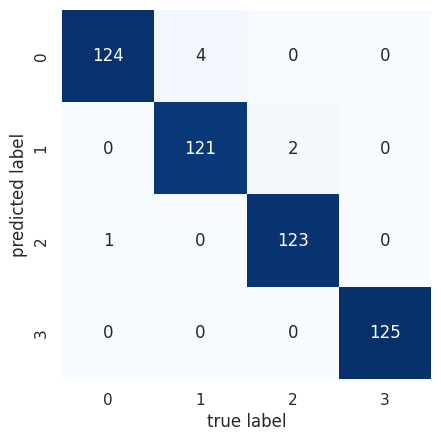

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_true, cluster_labels, labels=[0,1,2,3])
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues', xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, cluster_labels)

0.986